<a href="https://colab.research.google.com/github/nv-hiep/ML/blob/main/h10_ANNs_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Artificial Neural Networks with Keras

# Import libraries

In [1]:
# Common imports
import os
import math

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from IPython.display import Image

from matplotlib import rc
rc('animation', html='jshtml')


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras
assert keras.__version__ >= "2.1"



# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline

# 1. Perceptrons

A Perceptron is an algorithm used for supervised learning of binary classifiers. Binary classifiers decide whether an input, usually represented by a series of vectors, belongs to a specific class. In short, a perceptron is a single-layer neural network.

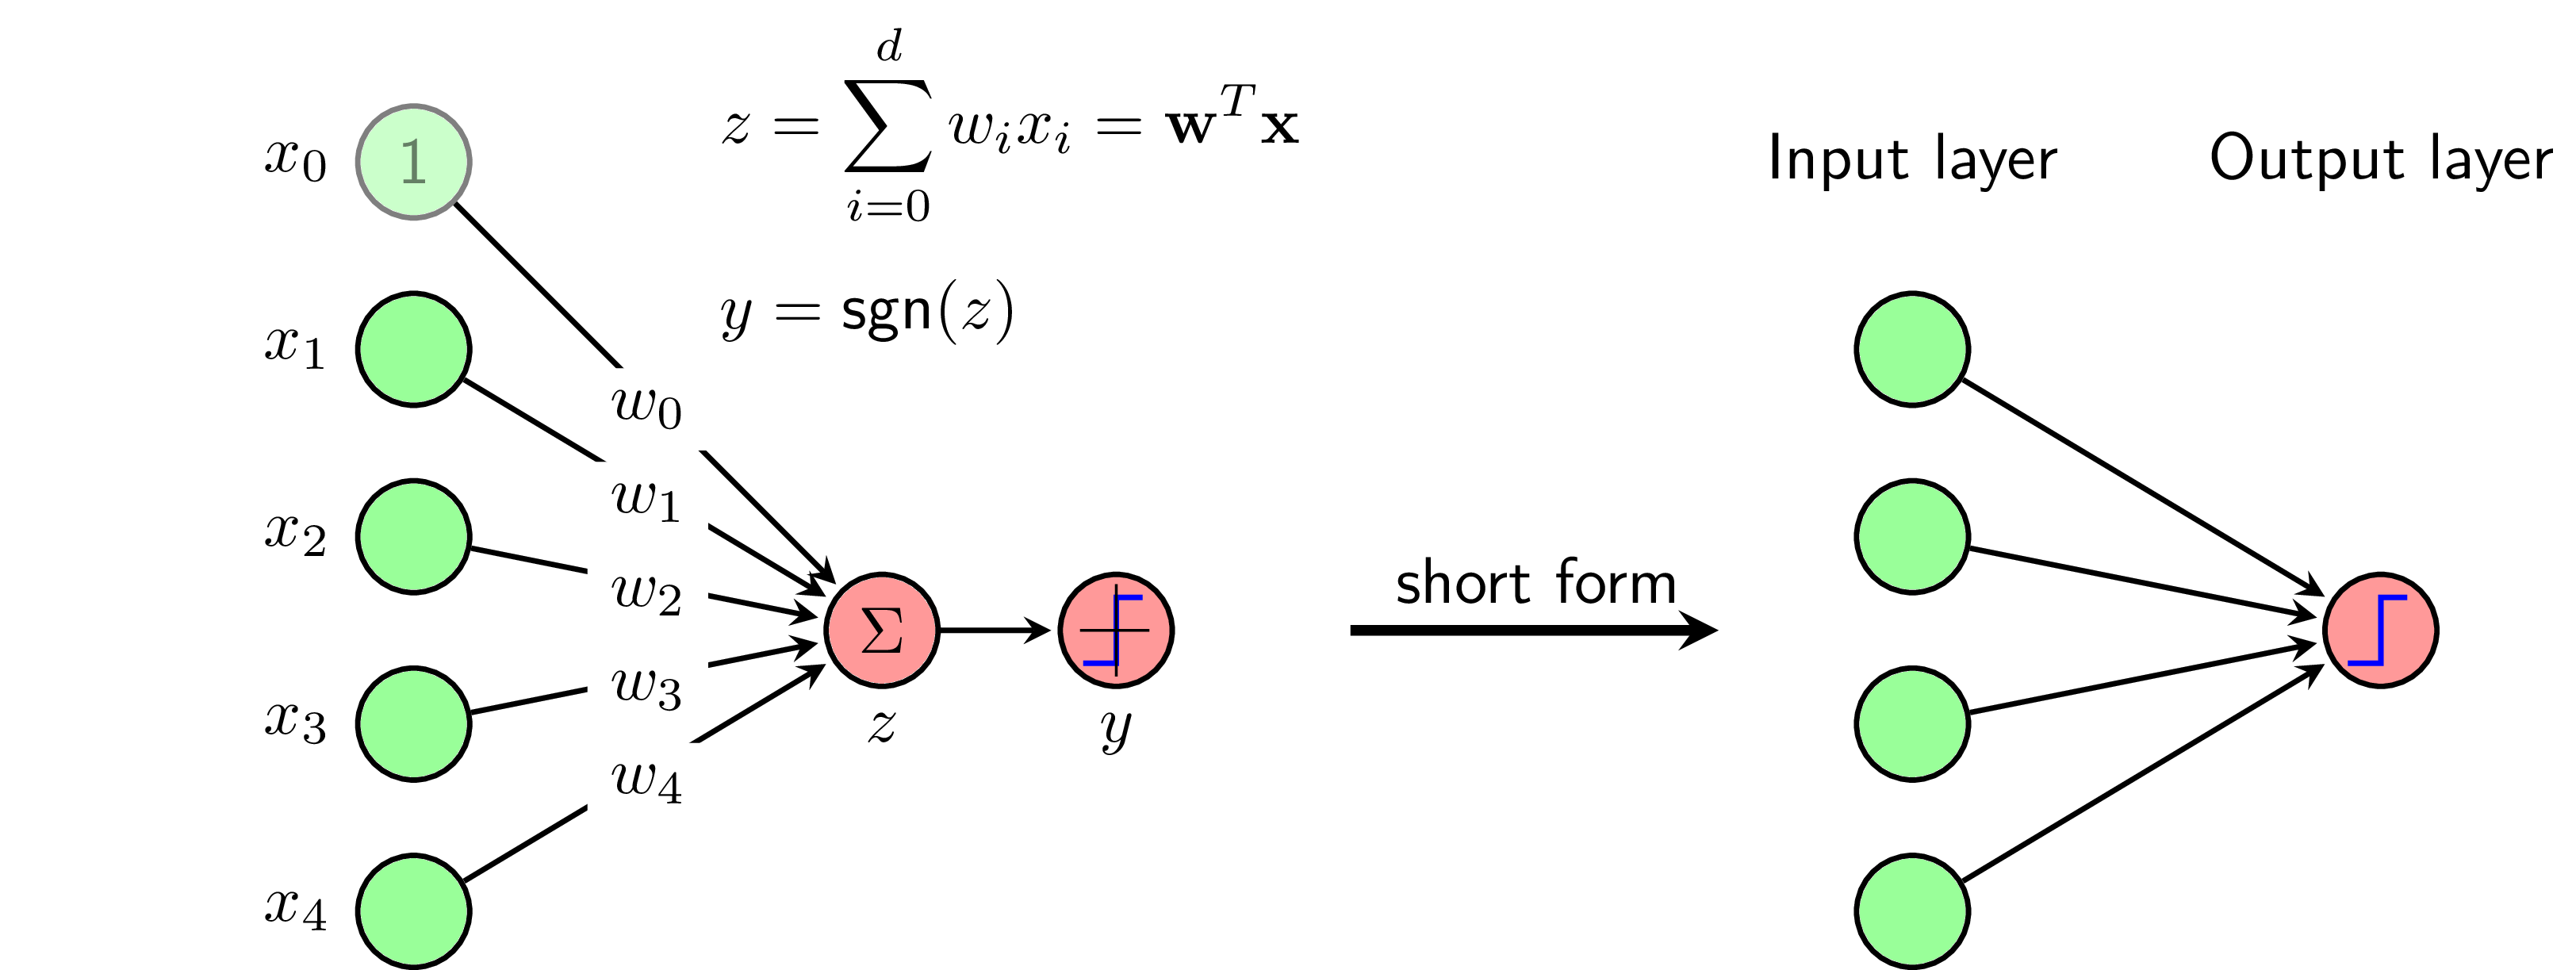

## 1.1 IRIS dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

print( 'IRIS keys: ', iris.keys() )
print( 'IRIS data: ', iris.data[:5] )

IRIS keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
IRIS data:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
class_names   = iris.target_names
feature_names = iris.feature_names[2:]

print('class_names: ', class_names)
print('feature_names: ', feature_names)

class_names:  ['setosa' 'versicolor' 'virginica']
feature_names:  ['petal length (cm)', 'petal width (cm)']


In [4]:
X = iris.data[:, 2:] # petal length, petal width
y = (iris.target == 0).astype(np.int) # is setosa or not

In [5]:
print('X shape: ', X.shape)
print(X[:3, :])
print()
print('y shape: ', y.size)
print(y[:10])

X shape:  (150, 2)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]

y shape:  150
[1 1 1 1 1 1 1 1 1 1]


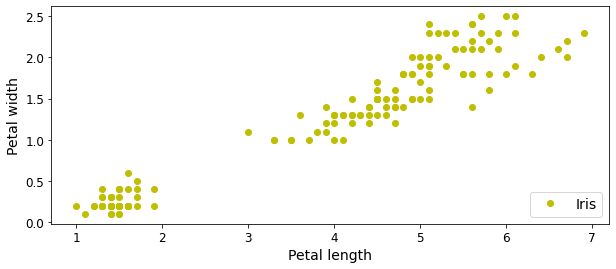

In [6]:
# from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 4))
# plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[:, 0], X[:, 1], "yo", label="Iris")

# plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

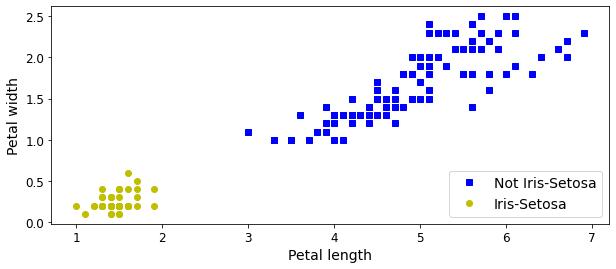

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

## 1.2 Perceptron classifier

In [8]:
# binary classifier
from sklearn.linear_model import Perceptron

pct_clf = Perceptron(random_state=42)
pct_clf.fit(X, y)

X_test = [2, 0.5]
y_pred = pct_clf.predict([X_test])

pred_labels = [ 'setosa' if x==1 else 'not setosa' for x in y_pred ]

print('Predicted label of X = {}: {}'.format(X_test, pred_labels))

Predicted label of X = [2, 0.5]: ['setosa']


In [9]:
print('Classes: ', pct_clf.classes_)
print()
print('coef_: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features) \n Weights assigned to the features: ', pct_clf.coef_)
print()
print('intercept_: ndarray of shape (1,) if n_classes == 2 else (n_classes,) \n Constants in decision function.: ', pct_clf.intercept_)

Classes:  [0 1]

coef_: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features) 
 Weights assigned to the features:  [[-1.4 -2.2]]

intercept_: ndarray of shape (1,) if n_classes == 2 else (n_classes,) 
 Constants in decision function.:  [4.]


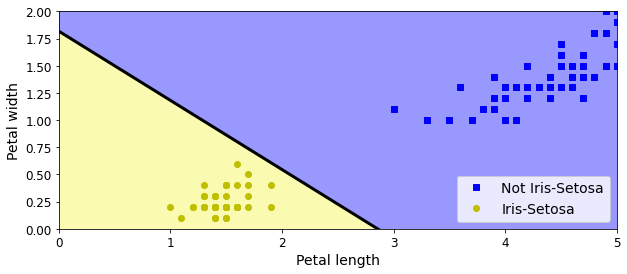

In [10]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

a = -pct_clf.coef_[0][0] / pct_clf.coef_[0][1]
b = -pct_clf.intercept_ / pct_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = pct_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

You may have noticed that the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer Logistic Regression over Perceptrons.

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='perceptron', penalty=None, learning_rate='constant', eta0=1.)
sgd_clf.fit(X, y)

X_test = [2, 0.5]
y_pred = pct_clf.predict([X_test])

print('Predicted label of X = {}: {}'.format(X_test, pred_labels))

Predicted label of X = [2, 0.5]: ['setosa']


#2. Activation functions

Sigmoid and ReLU functions

In [12]:
def sigmoid(z):
  return 1. / (1. + np.exp(-z))

def relu(z):
  return np.maximum(0, z)

def derv(fcn, z, eps=0.000001):
  return (fcn(z+eps) - fcn(z-eps)) / (2.*eps)

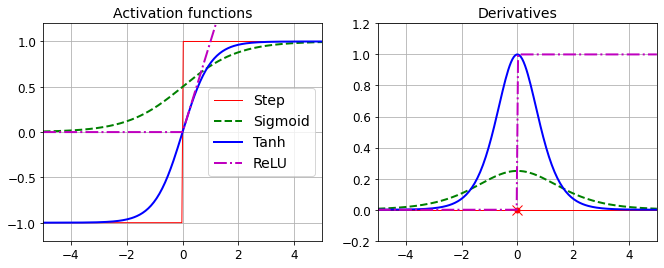

In [13]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derv(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derv(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derv(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derv(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

Heaviside Step function

In [14]:
def heaviside(z):
  return (z >= 0.).astype(z.dtype)

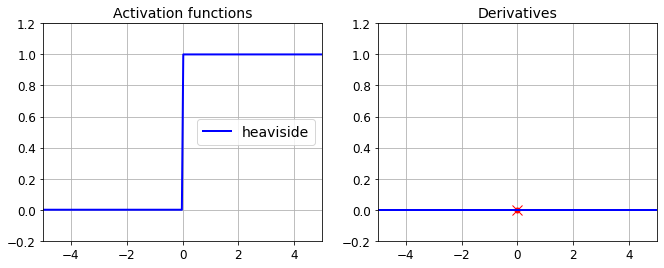

In [15]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, heaviside(z), "b-", linewidth=2, label="heaviside")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.subplot(122)
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derv(heaviside, z), "b-", linewidth=2, label="heaviside")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

# 3.  MLP for XOR problem

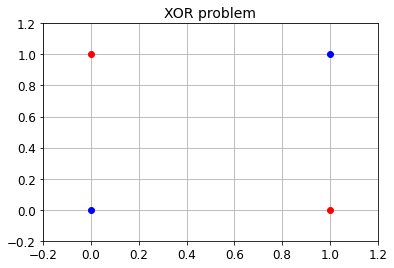

In [16]:
x_xor = np.array([0., 1., 1., 0.])
y_xor = np.array([0., 0., 1., 1.])
label = np.array([0,  1,  0,  1])

plt.figure(figsize=(6,4))

plt.plot(x_xor[label==0], y_xor[label==0], 'bo', linewidth=2, label='label 1')
plt.plot(x_xor[label==1], y_xor[label==1], 'ro', linewidth=2, label='label 2')
plt.grid(True)
# plt.legend(loc='upper left', fontsize=14)
plt.title('XOR problem', fontsize=14)
plt.axis([-0.2, 1.2, -0.2, 1.2])

plt.show()

XOR classification problem and an MLP that solves it
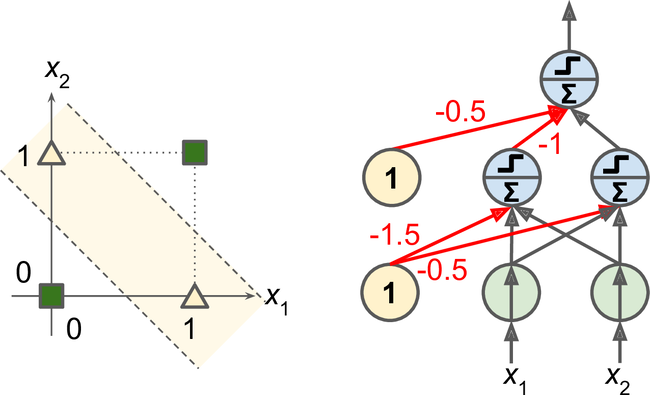

In [17]:
# Multiple Layer Perceptron for the previous image
def mpl_xor(activ_fcn, x, y):
  X_in  = np.array( [x, y, 1.] )
  w_in1 = np.array( [1., 1., -0.5] )
  w_in2 = np.array( [1., 1., -1.5] )

  h1  = activ_fcn( X_in.T.dot(w_in1) )
  h2  = activ_fcn( X_in.T.dot(w_in2) )
  X_h = np.array( [h1, h2, 1.] )
  w_h = np.array( [1., -1., -0.5] )

  out = activ_fcn( X_h.T.dot(w_h) )

  return out

x, y = 0., 0.
print('(x,y) = {} => label = {} \n'.format( (x,y), mpl_xor(heaviside, x, y) ) )

x, y = 1., 0.
print('(x,y) = {} => label = {} \n'.format( (x,y), mpl_xor(heaviside, x, y) ) )

x, y = 1., 1.
print('(x,y) = {} => label = {} \n'.format( (x,y), mpl_xor(heaviside, x, y) ) )

x, y = 0., 1.
print('(x,y) = {} => label = {} \n'.format( (x,y), mpl_xor(heaviside, x, y) ) )

(x,y) = (0.0, 0.0) => label = 0.0 

(x,y) = (1.0, 0.0) => label = 1.0 

(x,y) = (1.0, 1.0) => label = 0.0 

(x,y) = (0.0, 1.0) => label = 1.0 



In [18]:
# Multiple Layer Perceptron for the previous image
def mpl_xor_short(activ_fcn, x, y):
  return activ_fcn(activ_fcn(x+y-0.5) - activ_fcn(x+y-1.5) - 0.5)

x = np.array([0.])
y = np.array([1.])
mpl_xor_short(heaviside, x, y)

array([1.])

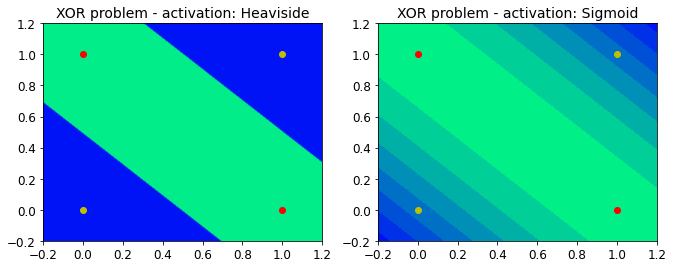

In [19]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z_heaviside = mpl_xor_short(heaviside, x1, x2)
z_sigmoid   = mpl_xor_short(sigmoid, x1, x2)

# Plot
plt.figure(figsize=(11,4))
cmap = plt.cm.get_cmap('winter')

plt.subplot(121)
plt.plot(x_xor[label==0], y_xor[label==0], 'yo', linewidth=2, label='label 1')
plt.plot(x_xor[label==1], y_xor[label==1], 'ro', linewidth=2, label='label 2')
plt.contourf(x1, x2, z_heaviside, cmap=cmap)

plt.grid(False)
# plt.legend(loc='upper left', fontsize=14)
plt.title('XOR problem - activation: Heaviside', fontsize=14)
plt.axis([-0.2, 1.2, -0.2, 1.2])


plt.subplot(122)
plt.plot(x_xor[label==0], y_xor[label==0], 'yo', linewidth=2, label='label 1')
plt.plot(x_xor[label==1], y_xor[label==1], 'ro', linewidth=2, label='label 2')
plt.contourf(x1, x2, z_sigmoid, cmap=cmap)

plt.grid(False)
# plt.legend(loc='upper left', fontsize=14)
plt.title('XOR problem - activation: Sigmoid', fontsize=14)
plt.axis([-0.2, 1.2, -0.2, 1.2])

plt.show()

#4. Classification MLPs with Keras

Structure of the Classification MLPs

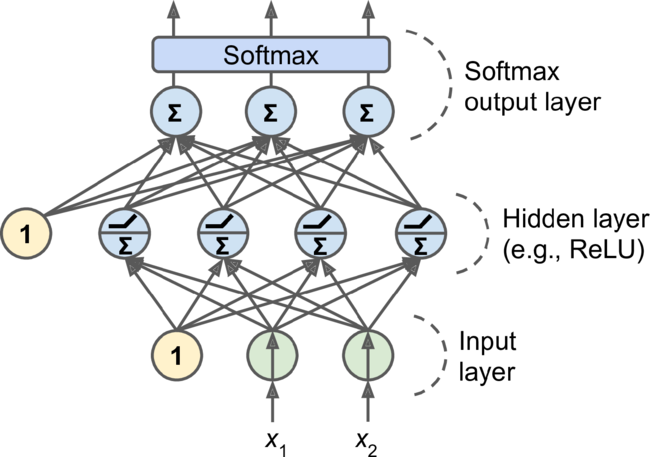

## 4.1 MNIST fashion data

In [20]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
print('X_train_full: ', X_train_full.shape)
print(f'y_train_full: {y_train_full}, of length = {len(y_train_full)}')

print('X_test: ', X_test.shape)
print(f'y_test: {y_test}, of length = {len(y_test)}')

X_train_full:  (60000, 28, 28)
y_train_full: [9 0 0 ... 3 0 5], of length = 60000
X_test:  (10000, 28, 28)
y_test: [9 2 1 ... 8 1 5], of length = 10000


Scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [23]:
X_train_full = X_train_full / 255.
X_test       = X_test / 255.

In [24]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

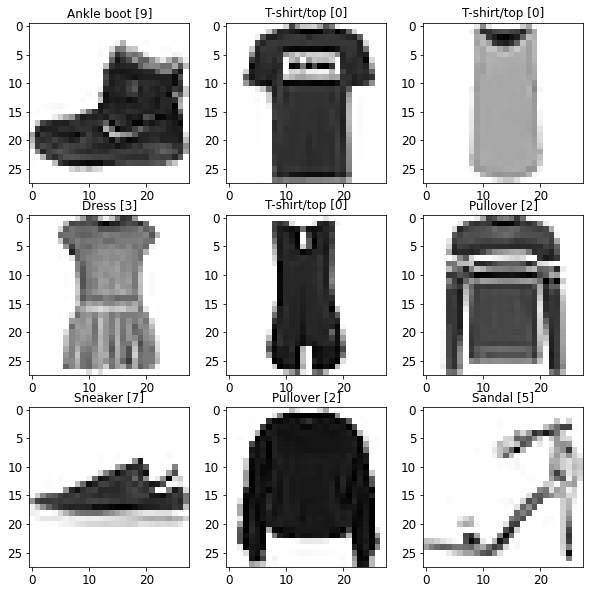

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.flatten()

for i in range(9):
  ax = axs[i]
  ax.imshow(X_train_full[i], cmap='binary', interpolation='nearest')
  ax.set_title(class_names[y_train_full[i]] + ' [' + str(y_train_full[i]) + ']' )

plt.show()

##4.2 Model

In [26]:
print(f'Number of labels: {len(class_names)}')

Number of labels: 10


Build model

In [27]:
model = keras.models.Sequential()
model.add( keras.layers.Flatten(input_shape=(28,28)) )
model.add( keras.layers.Dense(100, activation=keras.activations.relu) )
model.add( keras.layers.Dense(50, activation=keras.activations.relu) )
model.add( keras.layers.Dense(10, activation=keras.activations.softmax) )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [28]:
# You can easily get a model's list of layers, to fetch a layer by its index, or you can fetch it by name:
model.layers

In [29]:
input_layer = model.layers[0]
print(f'Input layer: {input_layer.name}' )

hidden1 = model.layers[1]
print(f'hidden1 layer 1: {hidden1.name}' )

hidden2 = model.layers[2]
print(f'hidden1 layer 2: {hidden2.name}' )

hidden3 = model.layers[3]
print(f'hidden1 layer 3: {hidden3.name}' )

print( model.get_layer('dense') is hidden1 )

Input layer: flatten
hidden1 layer 1: dense
hidden1 layer 2: dense_1
hidden1 layer 3: dense_2
True


In [30]:
# All attributes
hidden1.__dict__

{'_activity_regularizer': None,
 '_auto_track_sub_layers': True,
 '_autocast': True,
 '_build_input_shape': TensorShape([None, 784]),
 '_callable_losses': [],
 '_compute_dtype_object': tf.float32,
 '_default_training_arg': None,
 '_dtype_policy': <Policy "float32">,
 '_dynamic': False,
 '_expects_mask_arg': False,
 '_expects_training_arg': False,
 '_inbound_nodes_value': [<tensorflow.python.keras.engine.node.Node at 0x7fcde743ff10>],
 '_initial_weights': None,
 '_input_spec': InputSpec(min_ndim=2, axes={-1: 784}),
 '_instrumented_keras_api': True,
 '_instrumented_keras_layer_class': True,
 '_instrumented_keras_model_class': False,
 '_layers': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x7fcde7434600>,
 '_name': 'dense',
 '_non_trainable_weights': [],
 '_obj_reference_counts_dict': ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping 100>: 1, <_ObjectIdentityWrapper wrapping <function relu at 0x7fcdee2d3e60>>: 1, <_ObjectIdentityWrapper

In [31]:
# All the parameters of a layer can be accessed using its get_weights() and set_weights() methods.
# For a Dense layer, this includes both the connection weights and the bias terms:
weights, biases = hidden1.get_weights() # 100 Units, with 28x28 = 784 input units

print(f'Weight shape: {weights.shape}')
print(f'Weights W =: {weights}')
print()
print(f'Biases shape: {biases.shape}')
print(f'Biases B =: {biases}')

Weight shape: (784, 100)
Weights W =: [[ 0.07947645 -0.07669128  0.03572796 ...  0.02471202  0.06129877
  -0.01390949]
 [ 0.04505697 -0.04544005 -0.01694941 ...  0.0228358  -0.05176788
   0.04044654]
 [-0.04325209 -0.06456077  0.06196065 ... -0.02473585  0.06161614
  -0.07579501]
 ...
 [ 0.01945632 -0.01262835 -0.00257116 ...  0.07349464  0.03037734
  -0.05122336]
 [-0.06250188  0.05515358  0.03106479 ... -0.02770185  0.0550722
   0.0516455 ]
 [-0.0312202   0.05617554 -0.02823221 ...  0.06892121  0.02517708
   0.07357672]]

Biases shape: (100,)
Biases B =: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [32]:
# Compile
model.compile(optimizer='sgd', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# This is equivalent to:

# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(),
#               metrics=[keras.metrics.sparse_categorical_accuracy])

Train the model

In [33]:
# Training
history = model.fit(X_train_full, y_train_full, epochs=50, validation_split=0.15)
# model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1594/1594 [==============================] - 4s 2ms/step - loss: 1.0595 - accuracy: 0.6559 - val_loss: 0.5839 - val_accuracy: 0.8004
Epoch 2/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.5326 - accuracy: 0.8159 - val_loss: 0.5075 - val_accuracy: 0.8232
Epoch 3/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4703 - accuracy: 0.8354 - val_loss: 0.4933 - val_accuracy: 0.8142
Epoch 4/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4462 - accuracy: 0.8439 - val_loss: 0.4610 - val_accuracy: 0.8380
Epoch 5/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.4136 - accuracy: 0.8567 - val_loss: 0.4133 - val_accuracy: 0.8528
Epoch 6/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3991 - accuracy: 0.8602 - val_loss: 0.4147 - val_accuracy: 0.8573
Epoch 7/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3891 - accuracy: 0.8623 - val_loss: 0.3895 - val_accuracy:

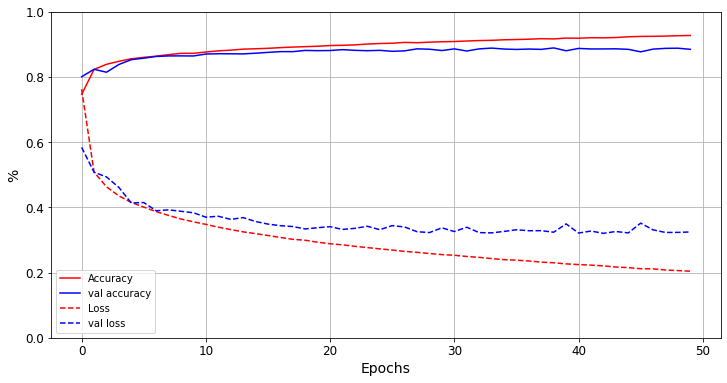

In [34]:
# Plot history
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], 'r-', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'b-', label='val accuracy')

plt.plot(history.history['loss'], 'r--', label='Loss')
plt.plot(history.history['val_loss'], 'b--', label='val loss')

plt.xlabel('Epochs')
plt.ylabel('%')

plt.ylim(0., 1.)

plt.legend()
plt.grid()

plt.show()

Evaluate and predict

In [35]:
# Evaluate
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8824


[0.3476976454257965, 0.8823999762535095]

In [36]:
# Predict
X_new  = X_test[:5]
y_pred = model.predict(X_new).round(2)
y_pred

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.53, 0.  , 0.  , 0.  , 0.  , 0.  , 0.46, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
# Predicted classes
y_pred_classes = np.argmax(y_pred, axis=-1)
print('Predicted classes:')
np.array( class_names )[y_pred_classes]

Predicted classes:


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'T-shirt/top'],
      dtype='<U11')

In [38]:
# True classes
y_true_classes = y_test[:5]
print('True classes:')
np.array( class_names )[y_true_classes]

True classes:


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

# 5. Regression MLP Using the Sequential API

##5.1 Housing price data

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [40]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [41]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [42]:
features = housing.feature_names
print(f'Feauture length: {len(features)}')
print('Features: \n', features)

Feauture length: 8
Features: 
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [43]:
X_full = housing.data
print(f'X_full shape {X_full.shape}')

X_full shape (20640, 8)


In [44]:
targets = housing.target
print(f'Target length: {len(targets)}')
print('target prince in $USD_1000: \n', targets)

Target length: 20640
target prince in $USD_1000: 
 [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [45]:
# Training, Validation and Testing datasets
X_train_full, X_test, y_train_full, y_test = train_test_split(X_full, targets, test_size=0.33, random_state=42)
X_train, X_valid, y_train, y_valid         = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [46]:
# Rescale the data
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [47]:
# Training set
print(f'X_train shape {X_train.shape}')
print(f'Target length: {len(y_train)}')

X_train shape (12445, 8)
Target length: 12445


In [48]:
# Validation set
print(f'X_valid shape {X_valid.shape}')
print(f'Target length: {len(y_valid)}')

X_valid shape (1383, 8)
Target length: 1383


In [49]:
# Test set
print(f'X_test shape {X_test.shape}')
print(f'Target length: {len(y_test)}')

X_test shape (6812, 8)
Target length: 6812


## 5.2 Model

In [50]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [51]:
sgd = keras.optimizers.SGD(learning_rate=1.e-3)
model.compile(optimizer=sgd, loss='mse')

In [52]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
389/389 [==============================] - 1s 1ms/step - loss: 3.5175 - val_loss: 0.8618
Epoch 2/30
389/389 [==============================] - 0s 1ms/step - loss: 0.8283 - val_loss: 0.7257
Epoch 3/30
389/389 [==============================] - 0s 1ms/step - loss: 0.7405 - val_loss: 0.6938
Epoch 4/30
389/389 [==============================] - 0s 1ms/step - loss: 0.6928 - val_loss: 0.6598
Epoch 5/30
389/389 [==============================] - 0s 1ms/step - loss: 0.6934 - val_loss: 0.6439
Epoch 6/30
389/389 [==============================] - 0s 1ms/step - loss: 0.6440 - val_loss: 0.6179
Epoch 7/30
389/389 [==============================] - 0s 1ms/step - loss: 0.6158 - val_loss: 0.6320
Epoch 8/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5916 - val_loss: 0.5905
Epoch 9/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5750 - val_loss: 0.5762
Epoch 10/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5623 - val_loss: 0.5766

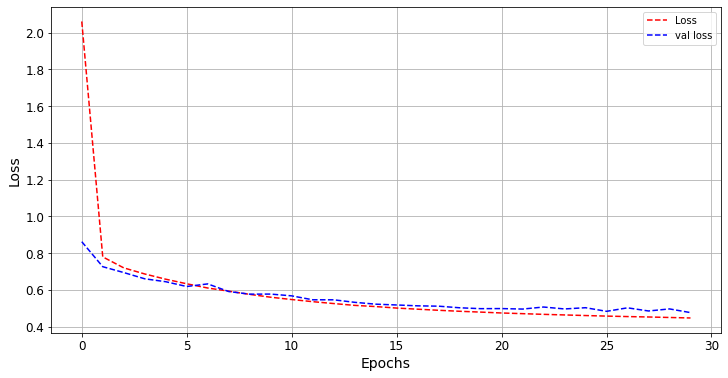

In [53]:
# Plot history
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'], 'r--', label='Loss')
plt.plot(history.history['val_loss'], 'b--', label='val loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

# plt.ylim(0., 1.)

plt.legend()
plt.grid()

plt.show()

In [54]:
# Evaluate
mse_test = model.evaluate(X_test, y_test)
mse_test

213/213 [==============================] - 0s 801us/step - loss: 0.4514


0.45136988162994385

In [55]:
# Predict
X_new = X_test[:5]
y_pred = model.predict(X_new)
print(f'Prediction y_pred = : {y_pred}' )
print(f'True price = : {y_test[:5]}' )

Prediction y_pred = : [[0.57541484]
 [1.6888132 ]
 [2.8778334 ]
 [2.8745408 ]
 [2.79472   ]]
True price = : [0.477   0.458   5.00001 2.186   2.78   ]


# 6. Building Complex Models Using the Functional API

## 6.1 Structure 1 - Wide & Deep with Concat

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer.

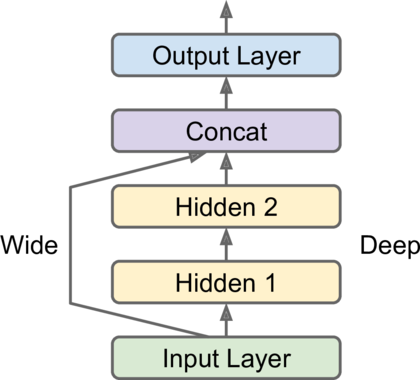

Let’s build such a neural network to tackle the California housing problem:

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
x_input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(x_input)
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)
concat  = keras.layers.concatenate([x_input, hidden2])
output  = keras.layers.Dense(1)(concat)

model   = keras.models.Model(inputs=[x_input], outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

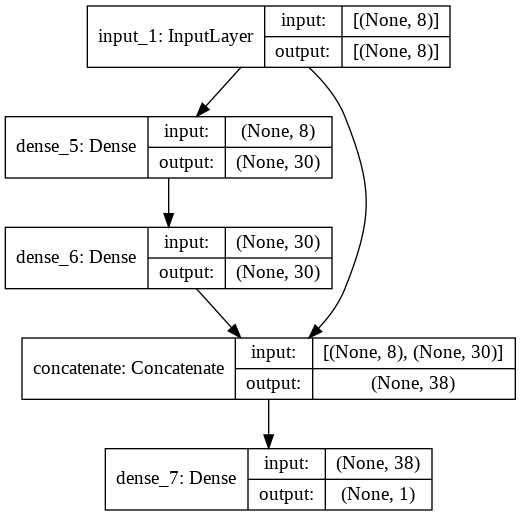

In [59]:
keras.utils.plot_model(model, 'a.png', show_shapes=True)

In [60]:
model.layers

In [61]:
model.compile(optimizer='adam', loss='mse')

In [62]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
389/389 [==============================] - 1s 2ms/step - loss: 1.3210 - val_loss: 0.5667
Epoch 2/30
389/389 [==============================] - 1s 1ms/step - loss: 0.4447 - val_loss: 0.4262
Epoch 3/30
389/389 [==============================] - 1s 1ms/step - loss: 0.3938 - val_loss: 0.4056
Epoch 4/30
389/389 [==============================] - 0s 1ms/step - loss: 0.3734 - val_loss: 0.3917
Epoch 5/30
389/389 [==============================] - 1s 1ms/step - loss: 0.3522 - val_loss: 0.4759
Epoch 6/30
389/389 [==============================] - 1s 1ms/step - loss: 0.3628 - val_loss: 0.3901
Epoch 7/30
389/389 [==============================] - 1s 1ms/step - loss: 0.3385 - val_loss: 0.4569
Epoch 8/30
389/389 [==============================] - 0s 1ms/step - loss: 0.3374 - val_loss: 0.3420
Epoch 9/30
389/389 [==============================] - 1s 1ms/step - loss: 0.3188 - val_loss: 0.4049
Epoch 10/30
389/389 [==============================] - 0s 1ms/step - loss: 0.3249 - val_loss: 0.3918

In [63]:
# Evaluate
mse_loss = model.evaluate(X_test, y_test)
mse_loss

213/213 [==============================] - 0s 803us/step - loss: 0.2916


0.29161012172698975

In [64]:
# Predict
X_new  = X_test[:5]
y_pred = model.predict(X_new)

print('True prices: ', y_test[:5])
print('Predicted prices: ', *[yi for yi in y_pred])

True prices:  [0.477   0.458   5.00001 2.186   2.78   ]
Predicted prices:  [0.4243431] [1.3677739] [4.540891] [2.6700597] [2.8921392]


##6.2 Structure 2 - Multi-Inputs

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path (see Figure below)? In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

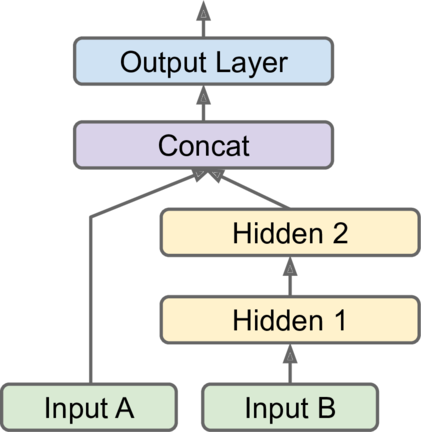

In [65]:
# Send 05 features through the wide path (features 0 to 4), and 06 features through the deep path (features 2 to 7):
# For input A
X_train_A = X_train[:, :5]
X_valid_A = X_valid[:, :5]
X_test_A  = X_test[:, :5]
X_new_A   = X_test_A[:4]

# For input B
X_train_B = X_train[:, 2:]
X_valid_B = X_valid[:, 2:]
X_test_B  = X_test[:, 2:]
X_new_B   = X_test_B[:4]

In [66]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:], name='input_A')
input_B = keras.layers.Input(shape=X_train_B.shape[1:], name='input_B')

hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input_B)
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)

concat  = keras.layers.concatenate([input_A, hidden2])

output  = keras.layers.Dense(1, name='output')(concat)

model   = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

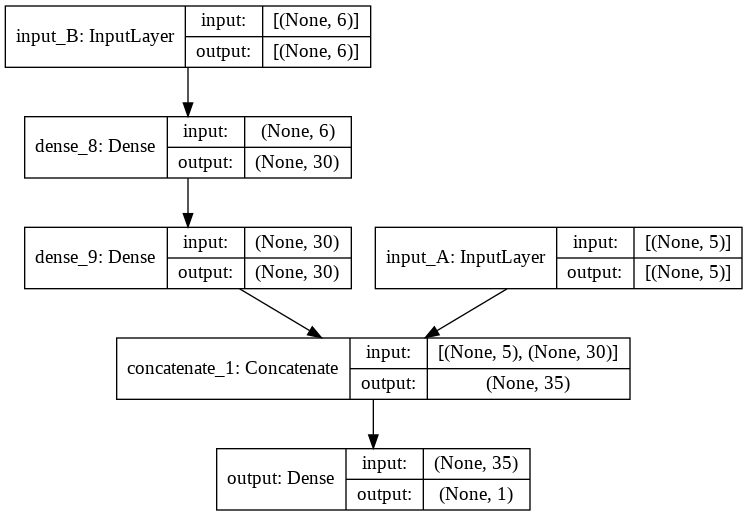

In [67]:
keras.utils.plot_model(model, 'a.png', show_shapes=True)

In [68]:
# Compile
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1.e-3), loss='mse')

In [69]:
# Training
history = model.fit([X_train_A, X_train_B], y_train, epochs=30, validation_data=([X_valid_A, X_valid_B], y_valid))

Epoch 1/30
389/389 [==============================] - 1s 1ms/step - loss: 2.7906 - val_loss: 0.8737
Epoch 2/30
389/389 [==============================] - 0s 1ms/step - loss: 0.7614 - val_loss: 0.6890
Epoch 3/30
389/389 [==============================] - 0s 1ms/step - loss: 0.6905 - val_loss: 0.6358
Epoch 4/30
389/389 [==============================] - 0s 1ms/step - loss: 0.6258 - val_loss: 0.5984
Epoch 5/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5811 - val_loss: 0.5750
Epoch 6/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5767 - val_loss: 0.5572
Epoch 7/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5457 - val_loss: 0.5412
Epoch 8/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 0.5357
Epoch 9/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5145 - val_loss: 0.5252
Epoch 10/30
389/389 [==============================] - 0s 1ms/step - loss: 0.5109 - val_loss: 0.5154

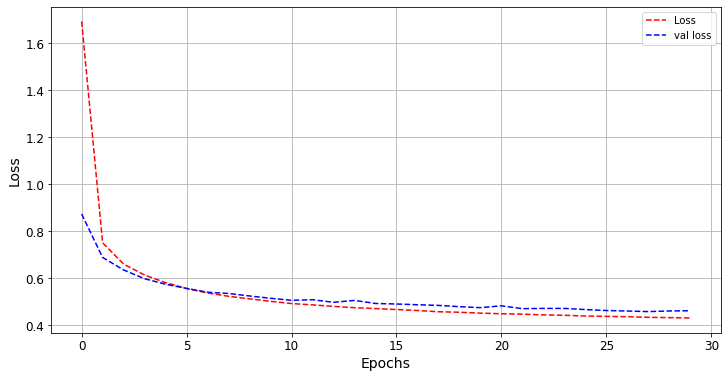

In [70]:
# Plot history
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'], 'r--', label='Loss')
plt.plot(history.history['val_loss'], 'b--', label='val loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

# plt.ylim(0., 1.)

plt.legend()
plt.grid()

plt.show()

In [71]:
# Evaluate
mse_test = model.evaluate([X_test_A, X_test_B], y_test)
mse_test

213/213 [==============================] - 0s 918us/step - loss: 0.4394


0.43940991163253784

In [72]:
# Predict
y_pred = model.predict([X_new_A, X_new_B])

print('True prices: ', y_test[:4])
print('Predicted prices: ', *[yi for yi in y_pred])

True prices:  [0.477   0.458   5.00001 2.186  ]
Predicted prices:  [0.34070027] [1.863991] [3.148941] [2.7289953]


## 6.3 Structure 3 - Multi-Outputs

There are many use cases in which you may want to have multiple outputs:

1. The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

2. Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.

3. Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

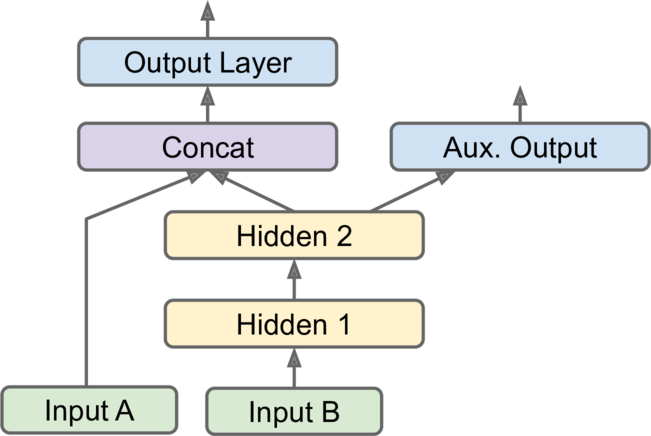

In [73]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:], name='input_A')
input_B = keras.layers.Input(shape=X_train_B.shape[1:], name='input_B')

hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input_B)
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)

concat  = keras.layers.concatenate([input_A, hidden2])

output1 = keras.layers.Dense(1, name='output1')(concat)
output2 = keras.layers.Dense(1, name='output2')(hidden2)

model   = keras.models.Model(inputs=[input_A, input_B], outputs=[output1, output2])

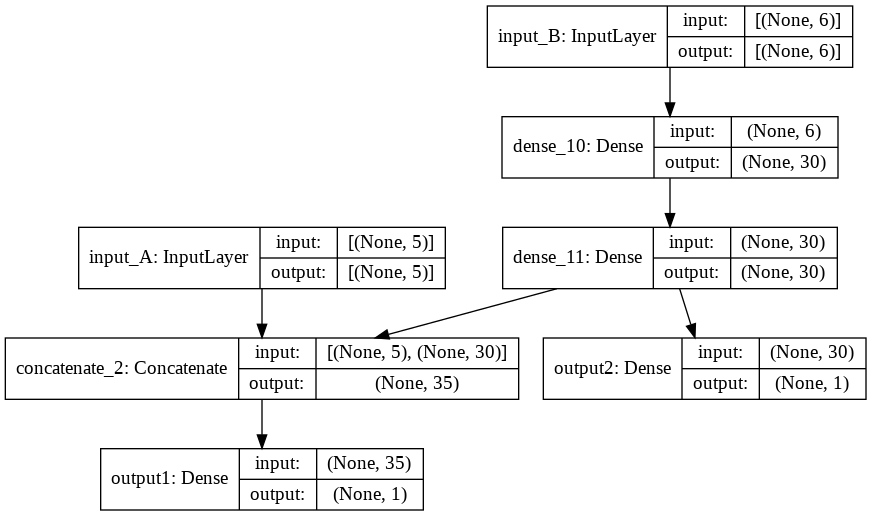

In [74]:
keras.utils.plot_model(model, 'a.png', show_shapes=True)

In [75]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_B (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           210         input_B[0][0]                    
__________________________________________________________________________________________________
input_A (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
____________________________________________________________________________________________

In [76]:
# Compile
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1.e-3), loss=['mse', 'mse'], loss_weights=[0.9, 0.1])

In [77]:
# Train
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]) )

Epoch 1/30
389/389 [==============================] - 1s 2ms/step - loss: 3.8039 - output1_loss: 3.4161 - output2_loss: 7.2942 - val_loss: 1.5579 - val_output1_loss: 1.1052 - val_output2_loss: 5.6328
Epoch 2/30
389/389 [==============================] - 0s 1ms/step - loss: 1.2590 - output1_loss: 0.8841 - output2_loss: 4.6324 - val_loss: 0.9541 - val_output1_loss: 0.7204 - val_output2_loss: 3.0579
Epoch 3/30
389/389 [==============================] - 1s 1ms/step - loss: 0.9128 - output1_loss: 0.7138 - output2_loss: 2.7030 - val_loss: 0.7763 - val_output1_loss: 0.6375 - val_output2_loss: 2.0250
Epoch 4/30
389/389 [==============================] - 1s 1ms/step - loss: 0.7653 - output1_loss: 0.6437 - output2_loss: 1.8600 - val_loss: 0.7035 - val_output1_loss: 0.6016 - val_output2_loss: 1.6206
Epoch 5/30
389/389 [==============================] - 1s 1ms/step - loss: 0.6944 - output1_loss: 0.6041 - output2_loss: 1.5071 - val_loss: 0.6603 - val_output1_loss: 0.5749 - val_output2_loss: 1.4290


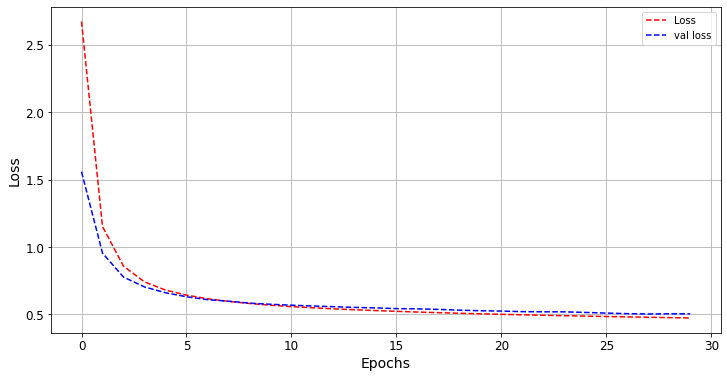

In [78]:
# Plot history
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'], 'r--', label='Loss')
plt.plot(history.history['val_loss'], 'b--', label='val loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

# plt.ylim(0., 1.)

plt.legend()
plt.grid()

plt.show()

In [79]:
# Evaluate
mse_total, mse_loss1, mse_loss2 = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f'mse_total: {mse_total}')
print(f'mse_loss1: {mse_loss1}')
print(f'mse_loss2: {mse_loss2}')

213/213 [==============================] - 0s 930us/step - loss: 0.4789 - output1_loss: 0.4474 - output2_loss: 0.7622
mse_total: 0.47891151905059814
mse_loss1: 0.44743260741233826
mse_loss2: 0.7622231841087341


In [80]:
# Predict
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

print('True prices: ', y_test[:4])
print('Predicted prices - main: ', *[yi for yi in y_pred_main])
print('Predicted prices - aux: ', *[yi for yi in y_pred_aux])

True prices:  [0.477   0.458   5.00001 2.186  ]
Predicted prices - main:  [0.34244484] [1.871639] [2.9100115] [2.6566598]
Predicted prices - aux:  [0.9951829] [1.9111323] [2.0495923] [2.3927321]


#7. Using the Subclassing API to Build Dynamic Models

Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly easy to debug, since the whole model is a static graph of layers.

But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

Simply subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want in the call() method. For example, creating an instance of the following WideAndDeepModel class gives us an equivalent model to the one we just built with the Functional API. You can then compile it, evaluate it, and use it to make predictions, exactly like we just did:

This example looks very much like the Functional API, except we do not need to create the inputs; we just use the input argument to the call() method, and we separate the creation of the layers in the constructor from their usage in the call() method. The big difference is that you can do pretty much anything you want in the call() method: for loops, if statements, low-level TensorFlow operations—your imagination is the limit (see Chapter 12)! This makes it a great API for researchers experimenting with new ideas.

In [81]:
# Subclassing Model API
class DynamicModel(keras.models.Model):
  #  create the layers you need in the constructor
  def __init__(self, **kwargs):
    super().__init__(**kwargs) # handles standard args (e.g., name)

    self.hidden1 = keras.layers.Dense(30, activation='relu')
    self.hidden2 = keras.layers.Dense(30, activation='relu')

    self.output1 = keras.layers.Dense(1)
    self.output2 = keras.layers.Dense(1)
  
  # use them (the layers) to perform the computations you want in the call() method
  def call(self, inputs):
    input_A, input_B = inputs

    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)

    concat  = keras.layers.concatenate([input_A, hidden2])

    output1 = self.output1(concat)
    output2 = self.output2(hidden2)

    return output1, output2

In [82]:
# Build model
model = DynamicModel()

In [83]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1.e-3),
              loss=['mse', 'mse'], loss_weights=[0.9, 0.1])

In [84]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30,
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/30
389/389 [==============================] - 1s 2ms/step - loss: 3.7323 - output_1_loss: 3.5367 - output_2_loss: 5.4926 - val_loss: 2.3150 - val_output_1_loss: 1.9728 - val_output_2_loss: 5.3953
Epoch 2/30
389/389 [==============================] - 1s 1ms/step - loss: 1.1552 - output_1_loss: 0.8331 - output_2_loss: 4.0539 - val_loss: 1.1803 - val_output_1_loss: 0.7823 - val_output_2_loss: 4.7622
Epoch 3/30
389/389 [==============================] - 1s 1ms/step - loss: 0.8938 - output_1_loss: 0.6815 - output_2_loss: 2.8046 - val_loss: 0.9975 - val_output_1_loss: 0.6219 - val_output_2_loss: 4.3784
Epoch 4/30
389/389 [==============================] - 1s 1ms/step - loss: 0.7783 - output_1_loss: 0.6257 - output_2_loss: 2.1524 - val_loss: 0.9320 - val_output_1_loss: 0.5930 - val_output_2_loss: 3.9824
Epoch 5/30
389/389 [==============================] - 1s 1ms/step - loss: 0.7145 - output_1_loss: 0.5923 - output_2_loss: 1.8143 - val_loss: 0.8674 - val_output_1_loss: 0.5694 - val_ou

In [85]:
model.summary()

Model: "dynamic_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  210       
_________________________________________________________________
dense_13 (Dense)             multiple                  930       
_________________________________________________________________
dense_14 (Dense)             multiple                  36        
_________________________________________________________________
dense_15 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


This extra flexibility does come at a cost: your model’s architecture is hidden within the call() method, so Keras cannot easily inspect it; it cannot save or clone it; and when you call the summary() method, you only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to the Sequential API or the Functional API.

**TIP: **
Keras models can be used just like regular layers, so you can easily combine them to build complex architectures.

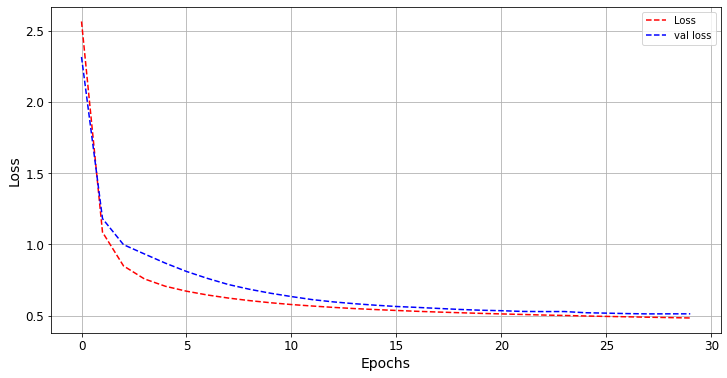

In [86]:
# Plot history
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'], 'r--', label='Loss')
plt.plot(history.history['val_loss'], 'b--', label='val loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

# plt.ylim(0., 1.)

plt.legend()
plt.grid()

plt.show()

In [87]:
# evaluate
mse_total, mse_main, mse_aux = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f'MSE total: {mse_total}')
print(f'MSE main: {mse_main}')
print(f'MSE aux: {mse_aux}')

213/213 [==============================] - 0s 948us/step - loss: 0.4861 - output_1_loss: 0.4368 - output_2_loss: 0.9301
MSE total: 0.4861202538013458
MSE main: 0.43679362535476685
MSE aux: 0.9300600290298462


In [88]:
# predict
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

print('True prices: ', y_test[:4])
print('Predicted prices - main: ', *[yi for yi in y_pred_main])
print('Predicted prices - aux: ', *[yi for yi in y_pred_aux])

True prices:  [0.477   0.458   5.00001 2.186  ]
Predicted prices - main:  [0.3769403] [2.044188] [2.9242802] [2.7429686]
Predicted prices - aux:  [1.0847197] [1.7405536] [2.24234] [2.2292461]


# 8. Saving and Restoring

In [89]:
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [91]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
389/389 [==============================] - 1s 1ms/step - loss: 3.1669 - val_loss: 0.9350
Epoch 2/10
389/389 [==============================] - 0s 1ms/step - loss: 0.6841 - val_loss: 0.6200
Epoch 3/10
389/389 [==============================] - 0s 1ms/step - loss: 0.6260 - val_loss: 0.5896
Epoch 4/10
389/389 [==============================] - 0s 1ms/step - loss: 0.5685 - val_loss: 0.5682
Epoch 5/10
389/389 [==============================] - 0s 1ms/step - loss: 0.5393 - val_loss: 0.5512
Epoch 6/10
389/389 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5210
Epoch 7/10
389/389 [==============================] - 0s 1ms/step - loss: 0.5092 - val_loss: 0.5097
Epoch 8/10
389/389 [==============================] - 0s 1ms/step - loss: 0.4938 - val_loss: 0.5108
Epoch 9/10
389/389 [==============================] - 0s 1ms/step - loss: 0.4775 - val_loss: 0.4905
Epoch 10/10
213/213 [==============================] - 0s 817us/step - loss: 0.4758


In [92]:
model.save('my_keras_model.h5')

In [93]:
model = keras.models.load_model('my_keras_model.h5')

In [94]:
y_pred = model.predict([X_new])

print('True prices: ', y_test[:4])
print('Predicted prices - main: ', *[yi for yi in y_pred])

True prices:  [0.477   0.458   5.00001 2.186  ]
Predicted prices - main:  [0.6367503] [1.6032583] [2.8011808] [2.7791157] [2.5096555]


In [95]:
model.save_weights('my_keras_weights.ckpt')

In [96]:
model.load_weights('my_keras_weights.ckpt')

**Warning**

This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

# 9. Using Callbacks during Training

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the fit() method to save checkpoints? Use callbacks.

The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

Moreover, if you use a validation set during training, you can set *save_best_only=True* when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. The following code is a simple way to implement early stopping

In [122]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [123]:
model = keras.models.Sequential([
  keras.layers.Input(shape=X_train.shape[1:]),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(1)
])

In [124]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1.e-3), loss='mse')

In [126]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model_checkpoint.h5', save_best_only=True)
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
          callbacks=[checkpoint_cb])

Epoch 1/20
389/389 [==============================] - 1s 1ms/step - loss: 3.1669 - val_loss: 0.9350
Epoch 2/20
389/389 [==============================] - 0s 1ms/step - loss: 0.6841 - val_loss: 0.6200
Epoch 3/20
389/389 [==============================] - 0s 1ms/step - loss: 0.6260 - val_loss: 0.5896
Epoch 4/20
389/389 [==============================] - 0s 1ms/step - loss: 0.5685 - val_loss: 0.5682
Epoch 5/20
389/389 [==============================] - 0s 1ms/step - loss: 0.5393 - val_loss: 0.5512
Epoch 6/20
389/389 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5210
Epoch 7/20
389/389 [==============================] - 0s 1ms/step - loss: 0.5092 - val_loss: 0.5097
Epoch 8/20
389/389 [==============================] - 0s 1ms/step - loss: 0.4938 - val_loss: 0.5108
Epoch 9/20
389/389 [==============================] - 0s 1ms/step - loss: 0.4775 - val_loss: 0.4905
Epoch 10/20
389/389 [==============================] - 0s 1ms/step - loss: 0.4778 - val_loss: 0.4834

In [127]:
model = keras.models.load_model('my_keras_model_checkpoint.h5') # rollback to best model

In [128]:
mse_test = model.evaluate(X_test, y_test)
print(f'MSE test: {mse_test}')

213/213 [==============================] - 0s 807us/step - loss: 0.4367
MSE test: 0.4366829991340637


Another way to implement early stopping is to simply use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources):

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of training.

In [139]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [140]:
model = keras.models.Sequential([
  keras.layers.Input(shape=X_train.shape[1:]),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(1)
])

In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1.e-3), loss='mse')

In [143]:
checkpoint_cb      = keras.callbacks.ModelCheckpoint('my_keras_model_checkpoint.h5', save_best_only=True)
early_stopping_cb  = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/150
389/389 [==============================] - 1s 1ms/step - loss: 3.1669 - val_loss: 0.9350
Epoch 2/150
389/389 [==============================] - 0s 1ms/step - loss: 0.6841 - val_loss: 0.6200
Epoch 3/150
389/389 [==============================] - 0s 1ms/step - loss: 0.6260 - val_loss: 0.5896
Epoch 4/150
389/389 [==============================] - 0s 1ms/step - loss: 0.5685 - val_loss: 0.5682
Epoch 5/150
389/389 [==============================] - 0s 1ms/step - loss: 0.5393 - val_loss: 0.5512
Epoch 6/150
389/389 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5210
Epoch 7/150
389/389 [==============================] - 0s 1ms/step - loss: 0.5092 - val_loss: 0.5097
Epoch 8/150
389/389 [==============================] - 0s 1ms/step - loss: 0.4938 - val_loss: 0.5108
Epoch 9/150
389/389 [==============================] - 0s 1ms/step - loss: 0.4775 - val_loss: 0.4905
Epoch 10/150
389/389 [==============================] - 0s 1ms/step - loss: 0.4778 - val_lo

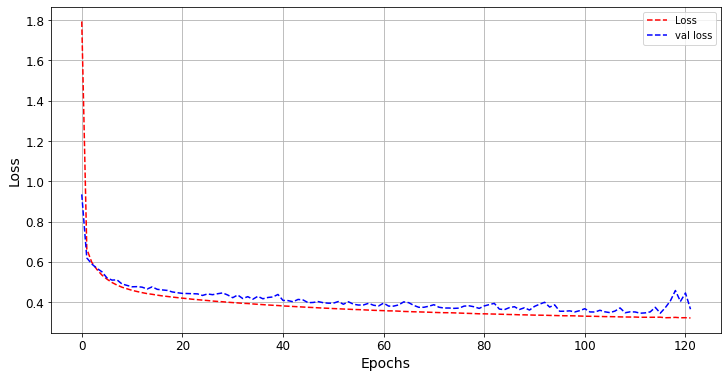

In [144]:
history = model.history

# Plot history
plt.figure(figsize=(12,6))

plt.plot(history.history['loss'], 'r--', label='Loss')
plt.plot(history.history['val_loss'], 'b--', label='val loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

# plt.ylim(0., 1.)

plt.legend()
plt.grid()

plt.show()

In [146]:
# Evaluate
mse_loss = model.evaluate(X_test, y_test)
mse_loss

213/213 [==============================] - 0s 814us/step - loss: 0.3438


0.34379297494888306

In [147]:
# Predict
X_new  = X_test[:5]
y_pred = model.predict(X_new)

print('True prices: ', y_test[:5])
print('Predicted prices: ', *[yi for yi in y_pred])

True prices:  [0.477   0.458   5.00001 2.186   2.78   ]
Predicted prices:  [0.5498032] [1.70753] [3.8362787] [2.677435] [2.7138739]


If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [148]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [149]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [150]:
model = keras.models.Sequential([
  keras.layers.Input(shape=X_train.shape[1:]),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(1)
])

In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1.e-3), loss='mse')

In [154]:
val_train_ratio_cb = PrintValTrainRatioCallback()
model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

Epoch 1/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3476 - val_loss: 0.3835

val/train: 1.10
Epoch 2/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3469 - val_loss: 0.3689

val/train: 1.06
Epoch 3/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3469 - val_loss: 0.3722

val/train: 1.07
Epoch 4/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3464 - val_loss: 0.3745

val/train: 1.08
Epoch 5/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3448 - val_loss: 0.3866

val/train: 1.12
Epoch 6/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3441 - val_loss: 0.3695

val/train: 1.07
Epoch 7/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3432 - val_loss: 0.3887

val/train: 1.13
Epoch 8/50
389/389 [==============================] - 0s 1ms/step - loss: 0.3429 - val_loss: 0.3887

val/train: 1.13
Epoch 9/50
389/389 [==============================] - 0s 1ms/ste

As you might expect, you can implement on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end(). Callbacks can also be used during evaluation and predictions, should you ever need them (e.g., for debugging). For evaluation, you should implement on_test_begin(), on_test_end(), on_test_batch_begin(), or on_test_batch_end() (called by evaluate()), and for prediction you should implement on_predict_begin(), on_predict_end(), on_predict_batch_begin(), or on_predict_batch_end() (called by predict()).

# 10. Hyperparameter Tuning

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross-validation). For example, we can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space.

To do this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [155]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [156]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  
  model.add(keras.layers.Dense(1))
  
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss='mse', optimizer=optimizer)
  
  return model

In [157]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The KerasRegressor object is a thin wrapper around the Keras model built using build_model(). Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in build_model(). Now we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method, as you can see in the following code:

Note that any extra parameter you pass to the fit() method will get passed to the underlying Keras model. Also note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e., higher should be better).

In [160]:
history = keras_reg.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid),
                        callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
389/389 [==============================] - 1s 1ms/step - loss: 1.6607 - val_loss: 0.7816
Epoch 2/50
389/389 [==============================] - 0s 1ms/step - loss: 0.5969 - val_loss: 0.6125
Epoch 3/50
389/389 [==============================] - 0s 1ms/step - loss: 0.5574 - val_loss: 0.5584
Epoch 4/50
389/389 [==============================] - 0s 1ms/step - loss: 0.5034 - val_loss: 0.5076
Epoch 5/50
389/389 [==============================] - 0s 1ms/step - loss: 0.4753 - val_loss: 0.4866
Epoch 6/50
389/389 [==============================] - 0s 1ms/step - loss: 0.4702 - val_loss: 0.4754
Epoch 7/50
389/389 [==============================] - 0s 1ms/step - loss: 0.4470 - val_loss: 0.4659
Epoch 8/50
389/389 [==============================] - 0s 1ms/step - loss: 0.4435 - val_loss: 0.4627
Epoch 9/50
389/389 [==============================] - 0s 1ms/step - loss: 0.4308 - val_loss: 0.4554
Epoch 10/50
389/389 [==============================] - 0s 1ms/step - loss: 0.4356 - val_loss: 0.4507

In [161]:
mse_test = keras_reg.score(X_test, y_test)
print(f'MSE test: {mse_test}')

213/213 [==============================] - 0s 858us/step - loss: 0.3754
MSE test: -0.37538856267929077


In [164]:
# Predict
X_new  = X_test[:5]
y_pred = keras_reg.predict(X_new)

print('True prices: ', y_test[:5])
print('Predicted prices: ', *[yi for yi in y_pred])

True prices:  [0.477   0.458   5.00001 2.186   2.78   ]
Predicted prices:  0.49585378 1.7161856 3.7062674 2.6446602 2.8915377


We don’t want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search (as we discussed in Chapter 2). Let’s try to explore the number of hidden layers, the number of neurons, and the learning rate:

In [165]:
np.random.seed(42)
tf.random.set_seed(42)

In [166]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

In [167]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


260/260 [==============================] - 1s 2ms/step - loss: 1.4443 - val_loss: 0.5366
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 0.5215 - val_loss: 0.5405
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4647 - val_loss: 0.4622
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4400 - val_loss: 0.4788
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4262 - val_loss: 0.4522
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4263 - val_loss: 0.4586
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4394 - val_loss: 0.4577
Epoch 8/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4549 - val_loss: 0.4518
Epoch 9/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4336 - val_loss: 0.4475
Epoch 10/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4942 - val_loss: 0.5450
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 1.3325 - val_loss: 0.5532
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4903 - val_loss: 0.5116
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4624 - val_loss: 0.4943
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4635 - val_loss: 0.4594
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4207 - val_loss: 0.4727
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4161 - val_loss: 0.4570
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4339 - val_loss: 0.5525
Epoch 8/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4377 - val_loss: 0.4527
Epoch 9/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4295 - val_loss: 0.4579
Epoch 10/100
260/260 [==============================] - 0s 1ms/step - loss: 0.4662 - val_lo

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.9min finished


389/389 [==============================] - 1s 2ms/step - loss: 1.4623 - val_loss: 1.0285
Epoch 2/100
389/389 [==============================] - 0s 1ms/step - loss: 0.4965 - val_loss: 0.4865
Epoch 3/100
389/389 [==============================] - 1s 1ms/step - loss: 0.4560 - val_loss: 0.6063
Epoch 4/100
389/389 [==============================] - 1s 1ms/step - loss: 0.4271 - val_loss: 0.4535
Epoch 5/100
389/389 [==============================] - 1s 1ms/step - loss: 0.4016 - val_loss: 0.4599
Epoch 6/100
389/389 [==============================] - 1s 1ms/step - loss: 0.3997 - val_loss: 0.4245
Epoch 7/100
389/389 [==============================] - 1s 1ms/step - loss: 0.3717 - val_loss: 0.4302
Epoch 8/100
389/389 [==============================] - 1s 1ms/step - loss: 0.3741 - val_loss: 0.4408
Epoch 9/100
389/389 [==============================] - 1s 1ms/step - loss: 0.3611 - val_loss: 0.3929
Epoch 10/100
389/389 [==============================] - 1s 1ms/step - loss: 0.3655 - val_loss: 0.4284
E

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fcdd9c00950>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.000392002...
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007

This is identical to what we did in Chapter 2, except here we pass extra parameters to the fit() method, and they get relayed to the underlying Keras models. Note that RandomizedSearchCV uses K-fold cross-validation, so it does not use X_valid and y_valid, which are only used for early stopping.


The exploration may last many hours, depending on the hardware, the size of the dataset, the complexity of the model, and the values of n_iter and cv. When it’s over, you can access the best parameters found, the best score, and the trained Keras model like this:

In [168]:
rnd_search_cv.best_params_

{'learning_rate': 0.005432590230265343, 'n_hidden': 2, 'n_neurons': 94}

In [169]:
rnd_search_cv.best_score_

-0.31606658299763996

In [170]:
rnd_search_cv.best_estimator_

In [171]:
rnd_search_cv.score(X_test, y_test)

213/213 [==============================] - 0s 904us/step - loss: 0.3178


-0.3178182542324066

In [172]:
model = rnd_search_cv.best_estimator_.model
model

In [173]:
model.evaluate(X_test, y_test)

213/213 [==============================] - 0s 796us/step - loss: 0.3178


0.3178182542324066

You can now save this model, evaluate it on the test set, and, if you are satisfied with its performance, deploy it to production. Using randomized search is not too hard, and it works well for many fairly simple problems. When training is slow, however (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. This approach will hopefully zoom in on a good set of hyperparameters. However, it’s very time consuming, and probably not the best use of your time.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. Such techniques take care of the “zooming” process for you and lead to much better solutions in much less time. Here are some Python libraries you can use to optimize hyperparameters:

Hyperopt: A popular library for optimizing over all sorts of complex search spaces (including real values, such as the learning rate, and discrete values, such as the number of layers).

Hyperas, kopt, or Talos: Useful libraries for optimizing hyperparameters for Keras models (the first two are based on Hyperopt).

Keras Tuner: An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.

Scikit-Optimize (skopt): A general-purpose optimization library. The BayesSearchCV class performs Bayesian optimization using an interface similar to GridSearchCV.

Spearmint: A Bayesian optimization library.

Hyperband: A fast hyperparameter tuning library based on the recent Hyperband paper by Lisha Li et al.

Sklearn-Deap: A hyperparameter optimization library based on evolutionary algorithms, with a GridSearchCV-like interface.